In [34]:
import pandas as pd
import numpy as np

In [35]:
#Get a dataset of handwritten digits
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [36]:
x, y = mnist['data'], mnist['target']
x.shape

(70000, 784)

In [37]:
y.shape

(70000,)

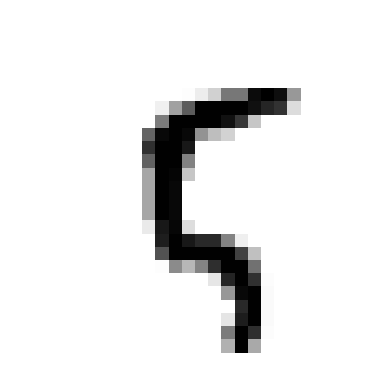

In [38]:
#plot one digit
import matplotlib.pyplot as plt
some_digit = x.iloc[100].to_numpy()
some_digit_img=some_digit.reshape(28, 28)
plt.imshow(some_digit_img, cmap='binary')
plt.axis('off')
plt.show()

In [39]:
#labele of the digit
y[100]

'5'

In [40]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/7, random_state=0)


In [41]:
#Lets have a binary classifier, to detect whether the digit is 5 or not
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')


In [ ]:
#Use a Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

In [ ]:
sgd_clf.predict(x_test.iloc[0:5])

array([False, False, False, False, False])

In [ ]:
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.96235, 0.9416 , 0.9694 ])

In [ ]:
#Perfoemance evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [ ]:
#confusion matrix
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53029,  1521],
       [ 1012,  4438]])

In [ ]:
#Precision and Recall
precision_score(y_train_5, y_train_pred)

0.744755831515355